In [116]:
import math

def f(x):
    return (100/x**2)*math.sin(10/x)

def simpsons_rule(f,a,b,n):
    #STEP 1
    h = (b - a)/n
    #STEP 2
    XI0 = f(a) + f(b)
    XI1 = 0
    XI2 = 0

    #STEP 3
    for i in range (1,n-1):
        #STEP 4
        X = a +i*h
        
        #STEP 5
        if i%2 == 0:
            XI2 = XI2 + f(X)
        else:
            XI1 = XI1 +f(X)
    #STEP 6
    XI = h*(XI0 + 2 * XI2 + 4 * XI1)/3
    return XI
    

    

def addaptive_quadrature(a,b,tol,n):
    #STEP 1
    APP = 0
    i = 1
    
    TOL = []
    TOL = [0 for i in range(n+1)]
    TOL[i] = tol * 10
    
    a_i = []
    a_i = [0 for i in range(n+1)]
    a_i[i] = a
    
    h = []
    h = [0 for i in range(n+1)]
    h[i] = (b-a)/2
    
    FA = []
    FA = [0 for i in range(n+1)]
    FA[i] = f(a)
    
    FC = []
    FC = [0 for i in range(n+1)]
    FC[i] = f(a + h[i])
    
    FB = []
    FB = [0 for i in range(n+1)]
    FB[i] = f(b)
    
    S = []
    S = [0 for i in range(n+1)]
    S[i] = h[i]*(FA[i] + 4*FC[i] + FB[i])/3
    
    L = []
    L = [0 for i in range(n+1)]
    L[i] = 1
    #STEP 2
    while i > 0:
        #STEP 3
        FD = f(a_i[i] + (h[i] / 2))
        FE = f(a_i[i] + (3*h[i] / 2))
        S1 = h[i] * (FA[i] + (4*FD) + FC[i]) / 6
        S2 = h[i] * (FC[i] + (4*FE) + FB[i]) / 6
        v1 = a_i[i]
        v2 = FA[i]
        v3 = FC[i]
        v4 = FB[i]
        v5 = h[i]
        v6 = TOL[i]
        v7 = S[i]
        v8 = L[i]
        #STEP 4
        i = i - 1
        
        #STEP 5
        if abs(S1 + S2 - v7) < v6:
            APP = APP + (S1 + S2)
        else:
            if (v8 >= n):
                print("LEVEL EXCEEDED")
                break
            else:
                i = i + 1
                a_i[i] = v1 + v5
                FA[i] = v3
                FC[i] = FE
                FB[i] = v4
                h[i] = v5/2
                TOL[i] = v6/2
                S[i] = S2
                L[i] = v8 + 1

                i = i + 1
                a_i[i] = v1
                FA[i] = v2
                FC[i] = FD
                FB[i] = v3
                h[i] = h[i - 1]          
                TOL[i] = TOL[i- 1]
                S[i] = S1
                L[i] = L[i- 1]
    #STEP 6
    return APP
    


def main():
    b , a , tol , n = 3, 1, 10**(-8), 10000
    simpson = simpsons_rule(f,a,b,n)
    simpson2 = simpsons_rule(f,a,b,n-1)
    adaptive = addaptive_quadrature(a,b,tol,n)
    
    
    
    print("Composite Simpson's Rule:", simpson)
    print("Composite Simpson's Rule Error Value:", abs(adaptive - simpson))
    print("Adaptive Quadrature:", adaptive)
    
    
    
main()
    
            



Composite Simpson's Rule: -1.4254593887505995
Composite Simpson's Rule Error Value: 0.0005653663214391091
Adaptive Quadrature: -1.4260247550720386


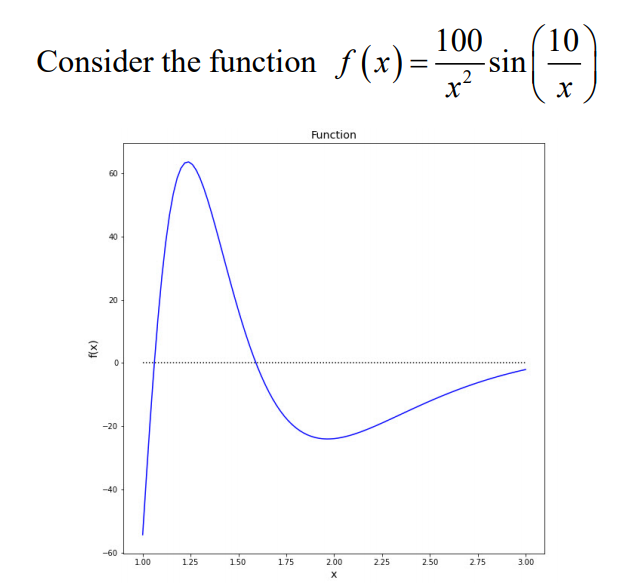
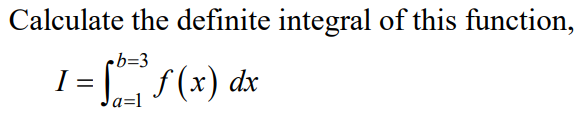

Referencing the pseudo code in the text book I was able to code the Adaptive Qudrature method and Composite simpsons method. In calculating the integral of the function above the exact result is -1.42602. When using the Adaptive Qudrature method it is accurate to the exact result. The lowest possible n value that is even for the Adaptive Qudrature method is 12, all n values above 12 will produce the same result. For the Composite simpsons method the n value is larger compared to the Adaptive Qudrature method which require a n value in the thousands. Inputting a n value within the thousands will bring a result that is within 3 place values of the exact calculation. The error bound for this is 0.0005653663214391091, which is a small value.    